## IRIS Dataset - Clustering

### Data Preperation

In [48]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv('iris.csv')

In [50]:
df.head(100).tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [51]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [52]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df = df.copy()

In [54]:
df.drop('Id',axis = 1,inplace = True)

In [55]:
df.shape

(150, 5)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
df.duplicated().sum()

3

In [58]:
df = df.drop_duplicates()

In [59]:
df.shape

(147, 5)

In [60]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [61]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

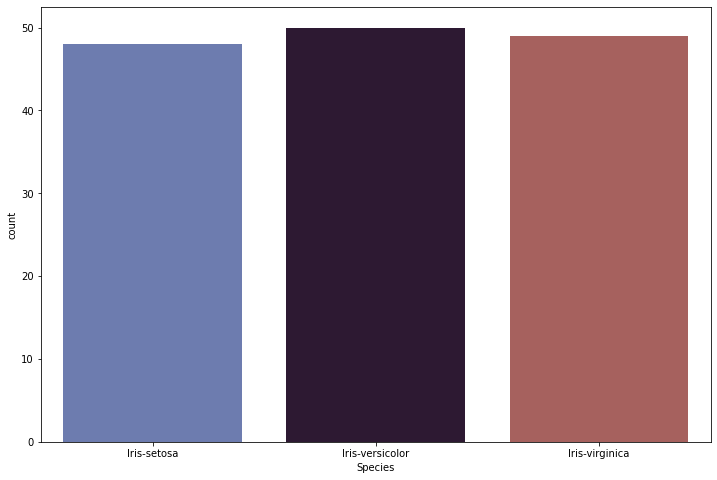

In [62]:
plt.figure(figsize=(12,8))
sns.countplot('Species', data = df,palette='twilight' )

<Figure size 864x576 with 0 Axes>

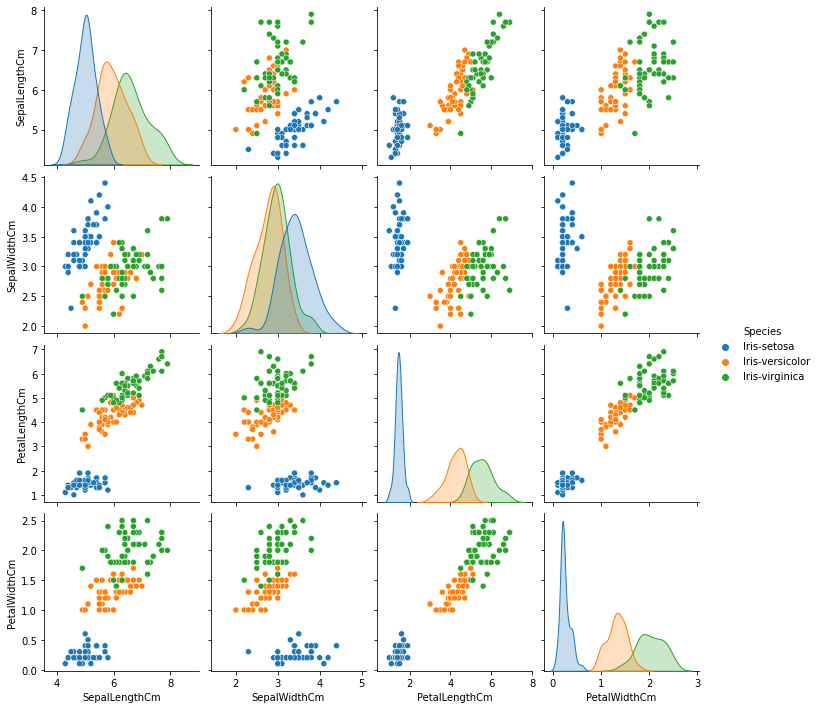

In [75]:
plt.figure(figsize=(12,8))
sns.pairplot(data = df,hue = 'Species')

In [ ]:
plt.figure(figsize=(15,12))
plt.scatter(x = )

#### Elbow method

In [64]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [87]:
X = df.drop('Species',axis = 1).values

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

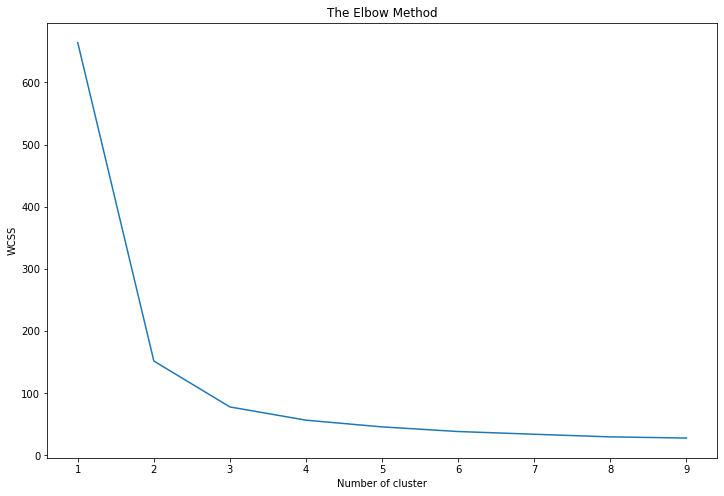

In [88]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state=101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')

#### Silhouete_method



In [89]:
range_n_clusters = [2, 3, 4, 5]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n,random_state=101)
    cluster_label = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_label)
    print("For n_clusters =", n,"The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.6771917356548319
For n_clusters = 3 The average silhouette_score is : 0.5509780950891296
For n_clusters = 4 The average silhouette_score is : 0.49397403978627596
For n_clusters = 5 The average silhouette_score is : 0.48607435609828115


In [90]:
#Chosen number of clusters is 3.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [91]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [92]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [5.90327869, 2.74918033, 4.38196721, 1.42622951]])

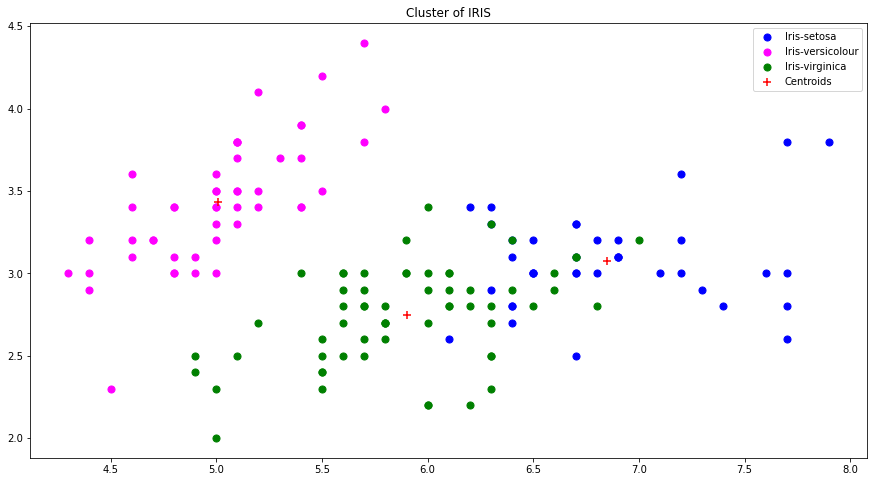

In [97]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'magenta', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids',marker = '+')
plt.title('Cluster of IRIS')
plt.legend()
plt.show()


## Hierarchical Clustering

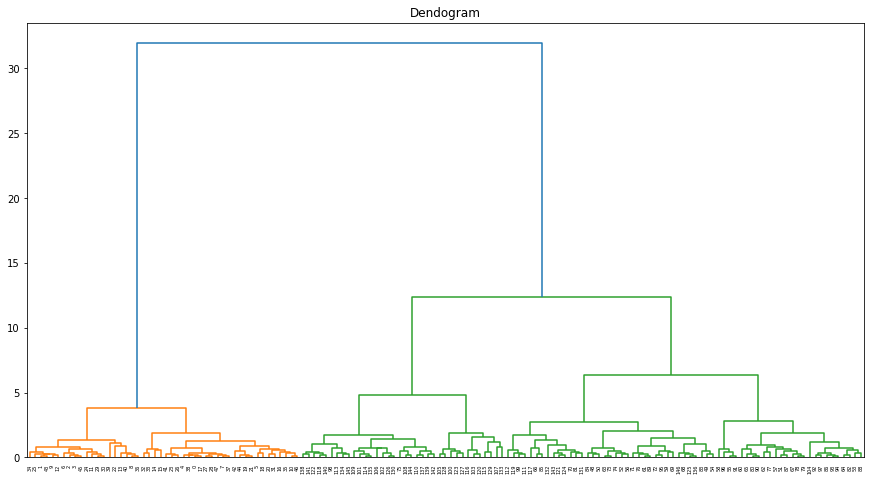

In [102]:
plt.figure(figsize=(15,8))
dendogram = sch.dendrogram(sch.linkage(X,method  = 'ward'))
plt.title('Dendogram')
plt.show()

In [104]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [105]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

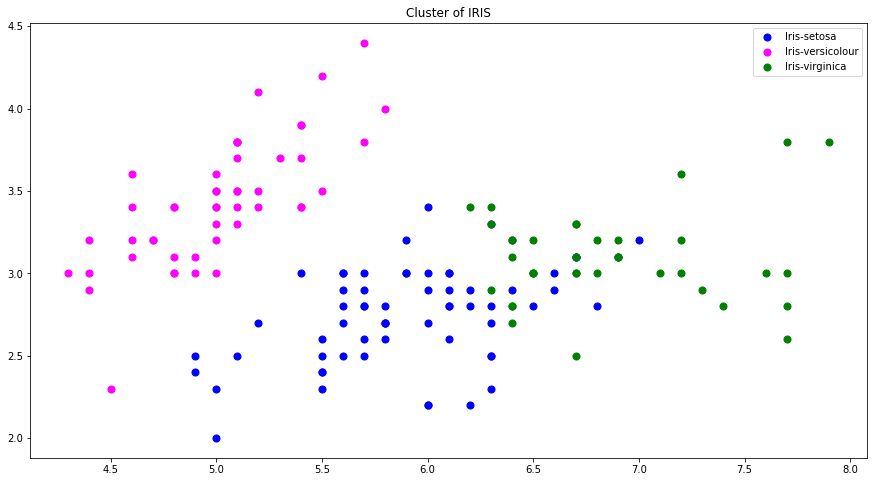

In [106]:
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'magenta', label = 'Iris-versicolour')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.title('Cluster of IRIS')
plt.legend()
plt.show()
